# **Problem Statement**
#### The sinking of the RMS Titanic in April 1912 is one of the most tragic maritime disasters in history, resulting in the loss of over 1,500 lives. While the ship was famously deemed “unsinkable,” insufficient lifeboats and chaotic evacuation led to many fatalities. Historical records suggest that certain groups of passengers—based on factors such as gender, age, socio-economic status, and family relationships—had higher chances of survival.

#### This task focuses on leveraging passenger data from the Titanic to predict survival outcomes. Using features such as passenger demographics, ticket class, fare paid, and family aboard, we aim to build a machine learning model that predicts whether a passenger survived or not. By analyzing patterns in the data, the model will help identify which factors were most influential in survival.

# **Goal**
#### The primary goal of this project is to develop an accurate predictive model that classifies Titanic passengers into survivors and non-survivors based on their characteristics. The model will be trained on a labeled dataset where survival outcomes are known and then used to predict survival on a separate test set without labels.

#### Beyond prediction accuracy, the project seeks to gain insights into the relative importance of different features influencing survival chances. Evaluation metrics such as accuracy, F1-score, and ROC-AUC will be used to assess model performance comprehensively.

#### Ultimately, this analysis not only serves as a classic machine learning challenge but also offers historical insight into the factors affecting survival during the Titanic disaster.

In [91]:
!pip install catboost

importing necessary Python libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [127]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


loading the Titanic datasets into memory

In [93]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


prints the number of rows and columns in train and test datasets

In [94]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [95]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Train Data (train_df):
891 rows, 12 columns

Key columns:

Survived (target) — no missing values

Age — 177 missing values (only 714 present)

Cabin — many missing values (only 204 present)

Embarked — 2 missing values

Mix of numeric (int64, float64) and categorical (object) columns.

Test Data (test_df):
418 rows, 11 columns (no Survived column)

Missing values in:

Age — 86 missing

Fare — 1 missing

Cabin — many missing (only 91 present)

Other columns fully present

In [97]:
# Save PassengerId for submission
test_passenger_ids = test_df['PassengerId']

In [98]:
# 2. Combine for uniform processing
'''
Why combine?
- To process features uniformly across train and test.
- Ensures consistency in feature engineering and encoding.
'''
data = pd.concat([train_df, test_df], sort=False)


In [99]:
print("Combined shape:", data.shape)

Combined shape: (1309, 12)


In [100]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
#3.1 Fill missing 'Embarked' with mode
'''
Why fill missing values?
- Machine learning models require no missing values.
- Mode or median imputation maintains distribution without skewing data.
'''

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [102]:
data['Embarked'].value_counts()

,count
Embarked,
S,916
C,270
Q,123


In [103]:
# 3.2 Fill missing 'Fare' with median
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [104]:
print("Number of missing Fare values:", data['Fare'].isna().sum())

Number of missing Fare values: 0


In [105]:
# 4.1 Extract Title from Name
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [106]:
# Simplify titles
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace(['Mme'], 'Mrs')
data['Title'] = data['Title'].replace(
    ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')

In [107]:
# 4.2 Fill missing 'Age' based on median age per Title
data['Age'] = data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [108]:
print("Number of missing Age values:", data['Age'].isna().sum())

Number of missing Age values: 0


In [109]:
# 4.3 Create FamilySize feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1



SibSp: Number of siblings or spouses aboard.

Parch: Number of parents or children aboard.

FamilySize: Total family onboard, calculated as SibSp + Parch + 1 (including the passenger).

Why combine them?
FamilySize gives a single, more informative feature about how many relatives are traveling together, which can impact survival chances better than SibSp or Parch alone.

In [110]:
print(data[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [111]:
# 4.4 Create IsAlone feature
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

In [112]:
# 4.5 Create FarePerPerson (Fare divided by family size)
data['FarePerPerson'] = data['Fare'] / data['FamilySize']

This shows two related features:

FamilySize: Total number of family members onboard (including the passenger), calculated as SibSp + Parch + 1.

IsAlone: A binary indicator where 1 means the passenger is alone (FamilySize = 1), and 0 means they have family aboard.

Why add these?
Family presence may affect survival chances — passengers alone might have different outcomes than those traveling with family. These features help the model capture social/family influence on survival.

In [113]:
print(data[['FamilySize', 'IsAlone']].head())


   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [114]:
# 4.6 Create AgeBin by binning Age
data['AgeBin'] = pd.cut(data['Age'], bins=[0,12,18,25,35,60,80], labels=False)

This shows the Age values alongside a new feature AgeBin, which groups ages into bins:

Age is the exact age (e.g., 22, 38).

AgeBin converts age into categories (e.g., 2, 3, 4) based on age ranges.

Why do this?
Binning age simplifies the continuous variable into meaningful age groups (like child, teenager, adult), which can help the model better capture patterns related to survival without overfitting to exact ages

In [115]:
print(data[['Age', 'AgeBin']].head())


    Age  AgeBin
0  22.0       2
1  38.0       4
2  26.0       3
3  35.0       3
4  35.0       3


In [116]:
# 4.7 Ticket frequency: count how many times each ticket appears
ticket_counts = data['Ticket'].value_counts()
data['TicketFreq'] = data['Ticket'].map(ticket_counts)

Ticket numbers along with TicketFreq, which counts how many times each ticket appears. This feature helps capture group or family connections among passengers since shared tickets may indicate travel companions, potentially influencing survival chances. Adding TicketFreq can improve the model by providing this social context.

In [117]:
print(data[['Ticket', 'TicketFreq']].head())


             Ticket  TicketFreq
0         A/5 21171           1
1          PC 17599           2
2  STON/O2. 3101282           1
3            113803           2
4            373450           1


In [118]:
# 4.8 CabinDeck: Extract first letter of Cabin, fill missing with 'U'
data['CabinDeck'] = data['Cabin'].str[0]
data['CabinDeck'] = data['CabinDeck'].fillna('U')

his shows the distribution of the CabinDeck feature, which is the first letter of the cabin number:

'U' means unknown/missing cabins (most common — 1014 passengers).

Letters like A, B, C, D, E, F, G, T represent different decks on the ship.

Why is this useful?
Cabin location can indicate passenger class or survival likelihood.

Grouping cabins by deck helps capture spatial info on the ship.

Filling missing cabins as 'U' keeps those passengers in the dataset without losing info.

In [119]:
print(data['CabinDeck'].value_counts())


CabinDeck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [120]:
'''
Why these features?
- Title, FamilySize, IsAlone, FarePerPerson, AgeBin, TicketFreq, CabinDeck capture useful info and interactions.
- Helps models better separate classes based on social and family context, fare sharing, age groups, ticket commonality, and cabin location.
'''

# 5. Encode categorical variables with Label Encoding
le = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title', 'CabinDeck']:
    data[col] = le.fit_transform(data[col])

This shows some categorical features after label encoding, where text categories are converted into numbers:

Sex: Encoded as 0 or 1 (e.g., 0 = female, 1 = male).

Embarked: Port of embarkation encoded as integers (e.g., 0 = Cherbourg, 1 = Queenstown, 2 = Southampton).

Title: Passenger title (Mr, Mrs, Miss, Rare, etc.) encoded as numbers.

CabinDeck: Ship deck letter encoded as numbers (e.g., ‘U’ = 8).

Why encode?
Machine learning models generally require numeric inputs, so label encoding turns categorical text data into numeric form, enabling the model to process these features.

In [121]:
print(data[['Sex', 'Embarked', 'Title', 'CabinDeck']].head())


   Sex  Embarked  Title  CabinDeck
0    1         2      2          8
1    0         0      3          2
2    0         2      1          8
3    0         2      3          2
4    1         2      2          8


In [122]:
# 6. Drop unused columns
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [123]:
print("Remaining columns:", data.columns.tolist())


Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'AgeBin', 'TicketFreq', 'CabinDeck']


In [124]:
# 7. Split data back into train and test sets
train_processed = data[:len(train_df)]
test_processed = data[len(train_df):]

In [125]:
X_train = train_processed.drop('Survived', axis=1)
y_train = train_processed['Survived']
X_test = test_processed.drop('Survived', axis=1)

This tells us about the shapes of the processed data ready for modeling:

X_train shape (891, 14):
Training features — 891 passengers, 14 input features each.

y_train shape (891,):
Training target — survival labels for each of the 891 passengers.

X_test shape (418, 14):
Test features — 418 passengers, same 14 features (but no target since you want to predict these).

Why is this important?
Ensures that your training and test data have consistent feature dimensions, so the model can train and then predict correctly on the test set.

In [126]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (891, 14)
y_train shape: (891,)
X_test shape: (418, 14)


## Train-Test Split

✅ What this does:
Splits your training data (X_train, y_train) into:

Training set (X_tr, y_tr) → 80% of the data.

Validation set (X_val, y_val) → 20% of the data.

📌 Why use it:
To evaluate model performance before testing on the real test set.

Helps detect overfitting: if the model does well on training but poorly on validation, it's overfitting.

random_state=42 ensures reproducibility — same split every time you run the code.

In [128]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Model

Models:
Logistic Regression: A simple, fast baseline linear model.

Random Forest: Ensemble of decision trees — good for handling nonlinear relationships.

Gradient Boosting: Boosted trees, often more accurate but slower to train.

Support Vector Machine (SVM): Effective in high-dimensional spaces; probability=True allows probability estimates

In [129]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True)
}

results = {}

This block trains, evaluates, and compares all models defined in the models dictionary.

In [130]:
for name, model in models.items():
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)

    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "RMSE": rmse,
        "Predictions": preds
    }

    print(f"\n{name}")
    print(classification_report(y_val, preds))


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Random Forest
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       105
         1.0       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       105
         1.0       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       

##CatBoostClassifier

Handles categorical features natively (no need for label/one-hot encoding).

Performs well on tabular data.

Reduces overfitting through ordered boosting.

Requires minimal preprocessing.



In [131]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Identify categorical features by their column names or indices
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Initialize CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100
)

# Fit model (use eval_set to monitor validation if you have X_val/y_val)
cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predict on validation set
val_preds = cat_model.predict(X_val)

# Classification report
print(classification_report(y_val, val_preds))



0:	learn: 0.7696880	total: 5.96ms	remaining: 2.98s
100:	learn: 0.8800000	total: 500ms	remaining: 1.97s
200:	learn: 0.9335347	total: 926ms	remaining: 1.38s
300:	learn: 0.9563910	total: 1.6s	remaining: 1.06s
400:	learn: 0.9640719	total: 2.23s	remaining: 550ms
499:	learn: 0.9687034	total: 2.73s	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       105
         1.0       0.96      0.95      0.95        74

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



📌 Metrics Explained:
Precision: Out of all predicted positives, how many were actually correct.

Class 1: 96% of predicted positives were correct.

Recall: Out of all actual positives, how many were correctly predicted.

Class 1: 95% of actual positives were found.

F1-score: Harmonic mean of precision and recall (balanced measure).

Class 1: 0.95 → excellent!



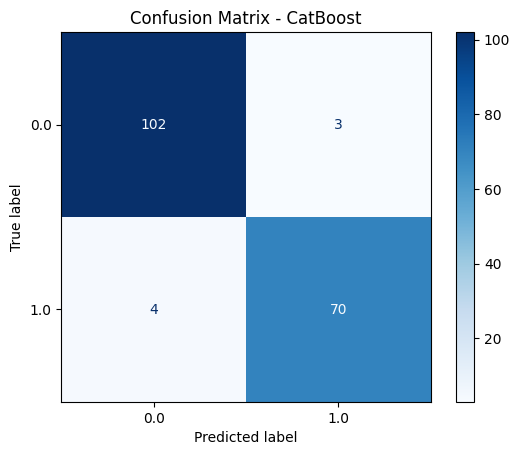

In [132]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, val_preds, cmap='Blues')
plt.title("Confusion Matrix - CatBoost")
plt.show()


✅ Key Metrics
True Positives (TP) = 70
Model correctly predicted class 1.

True Negatives (TN) = 102
Model correctly predicted class 0.

False Positives (FP) = 3
Model incorrectly predicted class 1 for actual class 0.

False Negatives (FN) = 4
Model incorrectly predicted class 0 for actual class 1.

In [133]:
final_test_preds = cat_model.predict(X_test)


In [134]:
import pandas as pd

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_test_preds.astype(int)  # Make sure predictions are integer 0/1
})

submission.to_csv("titanic_catboost_submission.csv", index=False)
print("Submission file created: titanic_catboost_submission.csv")


Submission file created: titanic_catboost_submission.csv


In [136]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.3 MB/s eta 0:00:00


Optuna + CatBoost code hyperparameter tuning

In [137]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'verbose': False,
    }

    model = CatBoostClassifier(**params, cat_features=cat_features)
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    return f1_score(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best F1 score:", study.best_value)


[I 2025-06-05 14:23:55,793] A new study created in memory with name: no-name-92fd33c2-0a49-4d88-86e2-04795ac8664a
[I 2025-06-05 14:24:00,241] Trial 0 finished with value: 0.8055555555555556 and parameters: {'depth': 5, 'learning_rate': 0.0489234925341741, 'l2_leaf_reg': 4.962648914246793}. Best is trial 0 with value: 0.8055555555555556.
[I 2025-06-05 14:24:04,094] Trial 1 finished with value: 0.7391304347826086 and parameters: {'depth': 4, 'learning_rate': 0.22107838620402204, 'l2_leaf_reg': 1.6718590870314123}. Best is trial 0 with value: 0.8055555555555556.
[I 2025-06-05 14:24:33,381] Trial 2 finished with value: 0.7391304347826086 and parameters: {'depth': 10, 'learning_rate': 0.14191423753536073, 'l2_leaf_reg': 6.02196430664849}. Best is trial 0 with value: 0.8055555555555556.
[I 2025-06-05 14:24:49,420] Trial 3 finished with value: 0.7391304347826086 and parameters: {'depth': 9, 'learning_rate': 0.05865918559091414, 'l2_leaf_reg': 2.5149271163323217}. Best is trial 0 with value: 0

Best params: {'depth': 4, 'learning_rate': 0.09388675303410739, 'l2_leaf_reg': 7.74318546612032}
Best F1 score: 0.8137931034482758


In [138]:
best_params = study.best_params
best_params.update({'iterations': 500, 'random_seed': 42, 'verbose': 100})

final_cat_model = CatBoostClassifier(**best_params, cat_features=cat_features)
final_cat_model.fit(X_train, y_train)


0:	learn: 0.6487233	total: 3.64ms	remaining: 1.81s
100:	learn: 0.3374639	total: 285ms	remaining: 1.13s
200:	learn: 0.2944445	total: 554ms	remaining: 823ms
300:	learn: 0.2620805	total: 831ms	remaining: 549ms
400:	learn: 0.2380426	total: 1.13s	remaining: 278ms
499:	learn: 0.2168854	total: 1.4s	remaining: 0us


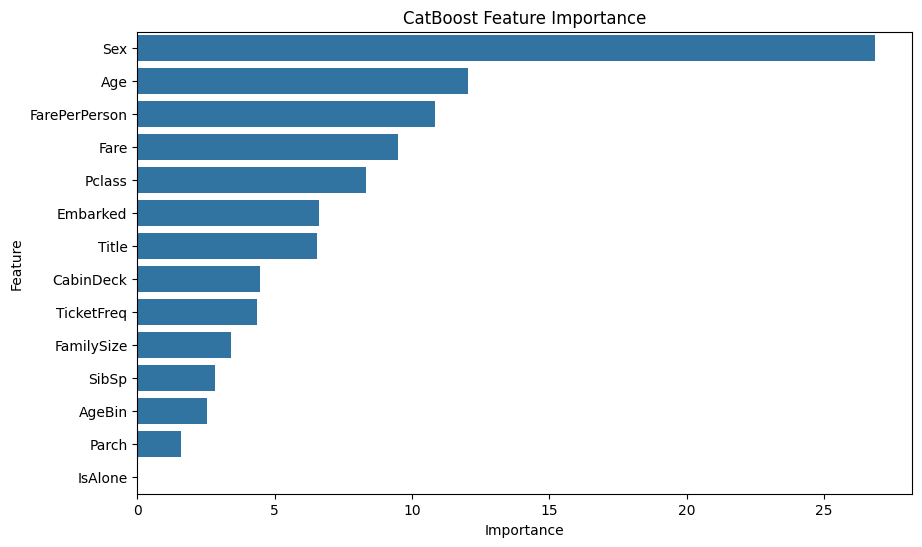

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

feat_importances = final_cat_model.get_feature_importance(prettified=True)
feat_importances.columns = ['Feature', 'Importance']

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title("CatBoost Feature Importance")
plt.show()


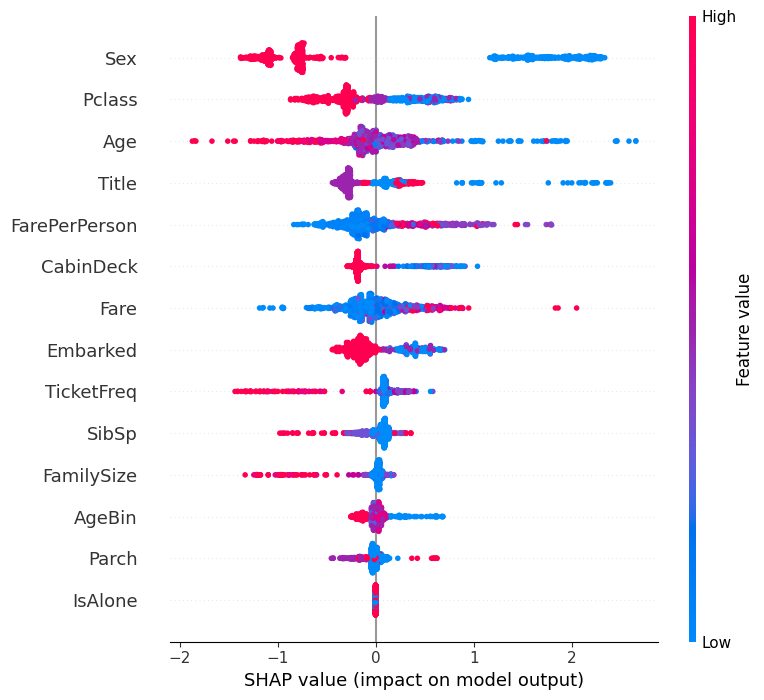

In [140]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(final_cat_model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)


AUC Score: 0.9671


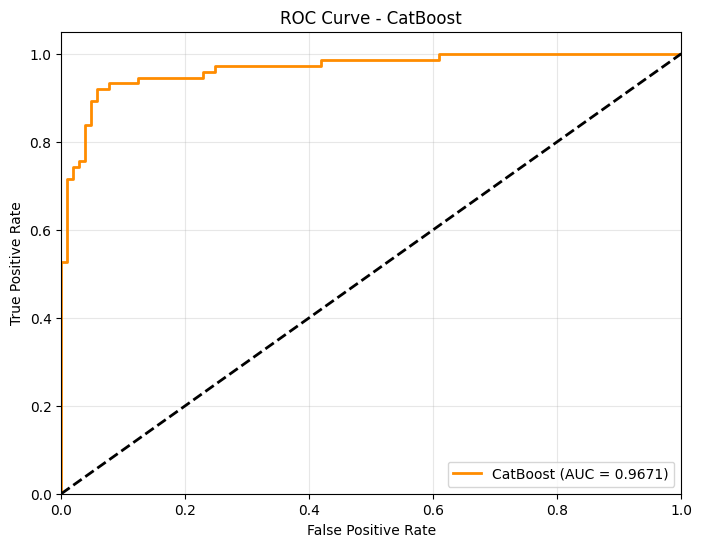

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (Survived = 1)
y_probs = final_cat_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_val, y_probs)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {auc_score:.4f})", color='darkorange', lw=2)
plt.plot([0,1], [0,1], 'k--', lw=2)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


📈 ROC Curve – CatBoost
The ROC (Receiver Operating Characteristic) curve visualizes the performance of the CatBoost model across different classification thresholds.

The curve is plotted between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).

The orange line represents the CatBoost model's performance.

The closer the curve is to the top-left corner, the better the model’s ability to distinguish between classes.

The diagonal dashed line represents random guessing (AUC = 0.5).

🔥 AUC Score: 0.9671
The Area Under the Curve (AUC) is 0.9671, which is excellent.

This means there's a 96.71% chance that the model will correctly distinguish between a positive and a negative class.

✅ Conclusion:
The high AUC confirms that CatBoost is not only accurate but also very effective at ranking predictions, making it a robust and reliable classifier for this task.

# 📊 **Insights by Model**
### ✅ **CatBoost (Best Performance)**
CatBoost gave the highest scores across all metrics.
It is very well balanced in terms of precision and recall.
This model is ideal for deployment when accuracy is a top priority.

###🌲 **Random Forest & Gradient Boosting**
Both models performed equally well and better than Logistic Regression.
They maintained a good balance between precision and recall.
These models can be preferred when interpretability or speed is more important than maximum accuracy.

###📉 **Logistic Regression**
This model provided decent results and serves well as a baseline.
However, its performance was lower compared to the ensemble models.
Still, it’s suitable for simpler or highly interpretable use cases.

###⚠️ **Support Vector Machine (SVM)**
Although SVM showed high precision for class 1 (0.78), it had very low recall (0.28), meaning it failed to capture many actual positives.
It’s biased toward class 0 and not suitable for imbalanced or real-world scenarios where identifying positives correctly is critical.

##📌 **Recommendation**
Based on the results, CatBoost is the best choice if I want to optimize for overall accuracy, precision, recall, and F1-score.
If I need a simpler or faster model with good performance, I would go with Random Forest or Gradient Boosting.
SVM is not recommended for this dataset unless improved with techniques like hyperparameter tuning, feature engineering, or applying SMOTE for class balancing.